Explained variance ratio for PCA [0.96331924 0.03668076]
Explained variance ratio for PCA [0.5063987 0.4936013]
Explained variance ratio for PCA [0.72470322 0.27529678]


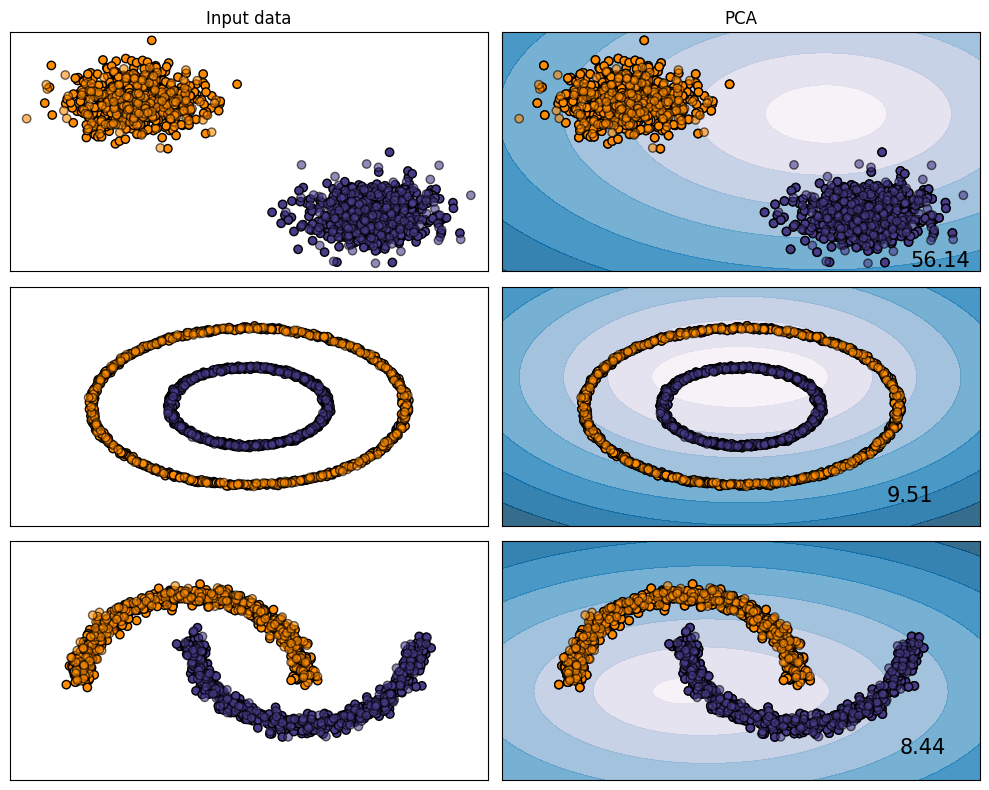

In [1]:
import numpy as np
np.random.seed(42)  # Set a random seed for reproducibility

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from pyod.models.pca import PCA

# Define the names and classifiers for each algorithm
names = ["PCA"]
classifiers = [PCA()]

# Generate different datasets to test the classifiers
datasets = [
    make_blobs(n_samples=1500, n_features=2, centers=2, random_state=42),
    make_circles(n_samples=1500, noise=0.01, factor=0.5, random_state=42),
    make_moons(n_samples=1500, noise=0.05, random_state=42)
]

# Set up the figure for displaying the results
figure = plt.figure(figsize=(10, 8))
i = 1

# Iterate over each dataset
for ds_cnt, ds in enumerate(datasets):
    # Preprocess the data and split into training and test sets
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Set the bounds for the plot
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Plot the training and test data for the current dataset
    cm = plt.cm.PuBu
    cm_bright = ListedColormap(["#FF8C00", "#483D8B"])

    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Iterate over each classifier
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train)

        # If the classifier is PCA, print the explained variance ratio
        if isinstance(clf.named_steps["pca"], PCA):
            pca = clf.named_steps["pca"]
            print("Explained variance ratio for", name, pca.explained_variance_ratio_)

        # Generate a decision boundary display for the classifier
        score = clf.decision_function(X_train)
        DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)

        # Plot the training and test data again on the same plot
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        #Plot the training and test data again on the same plot
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")

    # Set the axis limits and ticks
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    # Set the title of the plot to the name of the classifier
    if ds_cnt == 0:
        ax.set_title(name)

    # Add the score as text to the plot
    ax.text(x_max - 0.3, y_min + 0.3, ("%.2f" % score[0]).lstrip("0"), size=15, horizontalalignment="right")
    
    i += 1
plt.tight_layout()
plt.show()